In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
players = pd.read_csv('./clean_data/players.csv')
countries = pd.read_csv('./clean_data/countries.csv')
clubs = pd.read_csv('./clean_data/clubs.csv')

In [3]:
players = players.merge(countries[['name', 'points']], how='left', left_on='country', right_on='name')
players = players.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players = players.drop('name_y', axis=1)

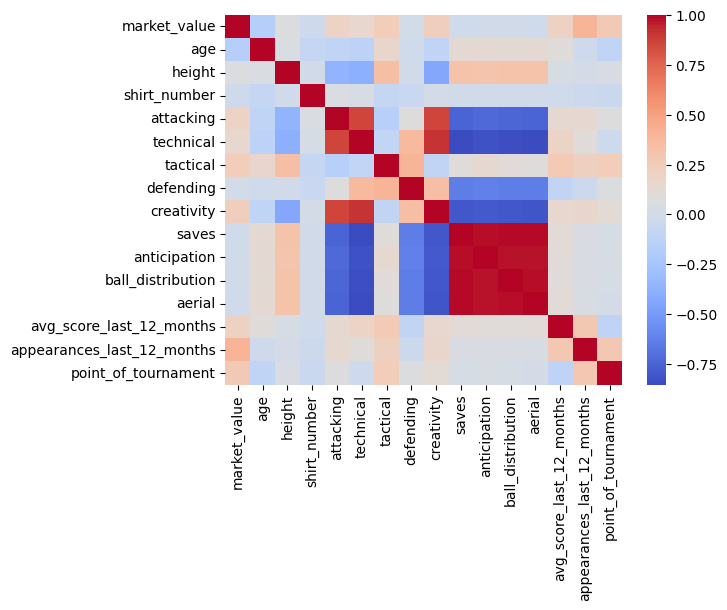

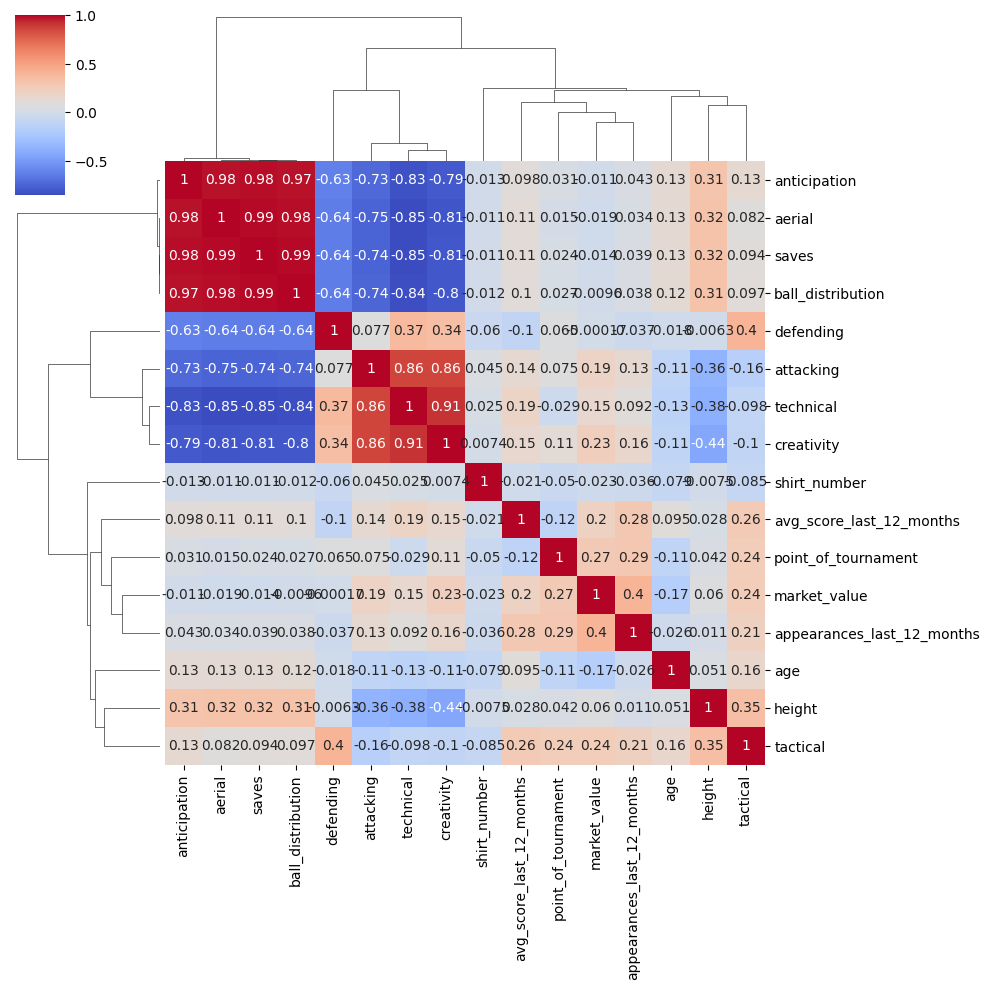

In [4]:
numeric_columns = players.select_dtypes(include=['float64', 'int64', 'int32', 'bool']).columns
sns.heatmap(players[numeric_columns].corr(),cmap='coolwarm')

sns.clustermap(players[numeric_columns].corr(),cmap='coolwarm',annot=True)

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
players_tsne = tsne.fit_transform(players[numeric_columns].values)
tsne.kl_divergence_

players_tsne = pd.DataFrame(players_tsne, columns=['x', 'y'])
players_tsne['position'] = players['position']

px.scatter(players_tsne, x='x', y='y', color='position')

In [6]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
players['cluster'] = kmeans.fit_predict(players[numeric_columns].values)

players_tsne['cluster'] = players['cluster']

px.scatter(players_tsne, x='x', y='y', color='cluster')

In [7]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
players_pca = pca.fit_transform(players[numeric_columns].values)
players_pca = pd.DataFrame(players_pca, columns=['x', 'y'])
players_pca['position'] = players['position']

px.scatter(players_pca, x='x', y='y', color='position')


In [8]:

players_pca['cluster'] = players['cluster']

px.scatter(players_pca, x='x', y='y', color='cluster')